In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

In [63]:
DATADIR='dataset'
CATEGORIES=['birds','celebrities','nameisnani','politics']

In [64]:
IMG_SIZE=64

In [93]:
training_data=[]
def create_training_data():
    i=0
    for cat in CATEGORIES:
        path=os.path.join(DATADIR,cat)
        class_num=CATEGORIES.index(cat)
        j=0
        for img in os.listdir(path):
            i+=1
            j+=1
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        print(j)
    print(i)

In [94]:
create_training_data()

53
63
213
1204
1533


In [67]:
training_data

[[array([[49, 49, 44, ..., 24, 22, 21],
         [49, 49, 45, ..., 25, 24, 23],
         [51, 47, 46, ..., 25, 25, 23],
         ...,
         [49, 48, 48, ..., 92, 90, 89],
         [42, 35, 47, ..., 91, 89, 87],
         [49, 46, 42, ..., 91, 89, 87]], dtype=uint8),
  0],
 [array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  0],
 [array([[53, 46, 50, ..., 48, 39, 36],
         [51, 46, 45, ..., 39, 38, 34],
         [52, 50, 47, ..., 34, 39, 39],
         ...,
         [77, 75, 74, ..., 87, 90, 95],
         [79, 79, 83, ..., 94, 93, 97],
         [84, 88, 90, ..., 98, 94, 90]], dtype=uint8),
  0],
 [array([[179, 179, 179, ..., 198, 197, 197],
         [179, 179, 179, ..., 198, 199, 199],
         [179, 179, 179, ..., 200, 200, 200],
         ...,
         [173, 172, 171, ..., 164, 163, 163],
         [169

In [74]:
len(training_data)

1533

In [69]:
X=[]
Y=[]

In [70]:
for features,label in training_data:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [71]:
len(X)

1533

In [72]:
len(Y)

1533

In [14]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y = label_binrizer.fit_transform(Y)
Y=np.array(Y)

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, shuffle=True)

In [26]:
x_train

array([[[[196],
         [195],
         [191],
         ...,
         [ 97],
         [ 85],
         [ 62]],

        [[196],
         [195],
         [191],
         ...,
         [ 11],
         [ 10],
         [  9]],

        [[196],
         [196],
         [194],
         ...,
         [  3],
         [  4],
         [  4]],

        ...,

        [[ 62],
         [ 63],
         [ 76],
         ...,
         [127],
         [130],
         [132]],

        [[ 64],
         [ 63],
         [ 69],
         ...,
         [123],
         [125],
         [128]],

        [[ 64],
         [ 63],
         [ 68],
         ...,
         [120],
         [122],
         [124]]],


       [[[253],
         [254],
         [254],
         ...,
         [ 15],
         [ 39],
         [ 60]],

        [[124],
         [175],
         [145],
         ...,
         [109],
         [ 69],
         [ 37]],

        [[191],
         [158],
         [207],
         ...,
         [188],
         [

In [27]:
x_train.shape

(1226, 64, 64, 1)

In [28]:
x_test

array([[[[117],
         [121],
         [125],
         ...,
         [ 86],
         [ 84],
         [ 83]],

        [[120],
         [126],
         [129],
         ...,
         [ 88],
         [ 85],
         [ 81]],

        [[120],
         [125],
         [128],
         ...,
         [ 90],
         [ 87],
         [ 83]],

        ...,

        [[119],
         [122],
         [122],
         ...,
         [ 33],
         [ 34],
         [ 45]],

        [[120],
         [122],
         [121],
         ...,
         [ 45],
         [ 32],
         [ 41]],

        [[119],
         [121],
         [121],
         ...,
         [ 55],
         [ 31],
         [ 38]]],


       [[[103],
         [103],
         [106],
         ...,
         [ 81],
         [ 79],
         [ 81]],

        [[103],
         [102],
         [106],
         ...,
         [ 80],
         [ 79],
         [ 78]],

        [[104],
         [106],
         [106],
         ...,
         [ 81],
         [

In [29]:
x_test.shape

(307, 64, 64, 1)

In [30]:
y_train

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [31]:
y_train.shape

(1226, 4)

In [32]:
y_test

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [33]:
y_test.shape

(307, 4)

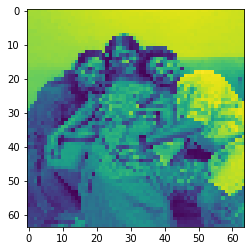

In [49]:
plt.imshow(x_train[6].reshape(64,64))

In [51]:
y_train[6]

array([0, 0, 1, 0])

In [43]:
x_train.shape

(1226, 4096)

In [19]:
from PIL import Image
import glob
import os

In [20]:
img_list=[]
resized_images=[]

In [21]:
for i in glob.glob(r'C:\Users\Sahithi Sarika\Downloads\original\*.jpg'):
    print(i)
    img=Image.open(i)
    img_list.append(img)

C:\Users\Sahithi Sarika\Downloads\original\Cloudy1.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy10.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy11.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy12.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy13.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy14.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy15.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy16.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy17.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy18.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy19.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy2.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy20.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy3.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy4.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy5.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy6.jpg
C:\Users\Sahithi Sarika\Downloads\original\Cloudy7.jpg

In [22]:
for i in img_list:
    #i.show()
    image=i.resize((300,300))
    resized_images.append(image)

In [ ]:
for (i,new) in enumerate(resized_images):
    new.save('{}{}{}'.format(r'C:\Users\Sahithi Sarika\Downloads\org\b',i+1,'.png'))

In [13]:
img_list=[]
resized_images=[]

In [14]:
for i in glob.glob(r'C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\*.jpg'):
    print(i)
    img=Image.open(i)
    img_list.append(img)

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2019-07-08_07-24-43_UTC_profile_pic.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2020-11-06_12-43-15_UTC_profile_pic.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2021-01-18_12-18-52_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2021-01-18_12-18-52_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2021-01-18_12-18-52_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2021-01-23_12-14-38_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\celebrities\2021-01-23_12-14-38_UTC_2.jpg
C:\Users\Sahithi Sari

In [15]:
for i in img_list:
    #i.show()
    image=i.resize((300,300))
    resized_images.append(image)

In [17]:
for (i,new) in enumerate(resized_images):
    new.save('{}{}{}'.format(r'C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\new_dataset\Celebrities\c',i+1,'.jpg'))

In [18]:
img_list=[]
resized_images=[]

In [19]:
for i in glob.glob(r'C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\*.jpg'):
    print(i)
    img=Image.open(i)
    img_list.append(img)

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-10-24_07-26-15_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-10-26_12-00-45_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-11-04_09-59-33_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-11-14_11-49-18_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-11-22_12-00-54_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-12-03_05-29-17_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2019-12-08_09-12-50_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-A

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-02-22_11-45-39_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-02-24_10-38-09_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-03-08_08-43-07_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-03-18_11-26-19_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-03-20_05-21-05_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-03-22_12-36-59_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\nameisnani\2021-03-28_12-50-41_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-A

In [20]:
for i in img_list:
    #i.show()
    image=i.resize((300,300))
    resized_images.append(image)

In [21]:
for (i,new) in enumerate(resized_images):
    new.save('{}{}{}'.format(r'C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\new_dataset\Nameisnani\n',i+1,'.jpg'))

In [22]:
img_list=[]
resized_images=[]

In [23]:
for i in glob.glob(r'C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\*.jpg'):
    print(i)
    img=Image.open(i)
    img_list.append(img)

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-10_08-35-18_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-10_16-38-53_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-11_05-20-57_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-11_11-47-54_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-11_16-22-28_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-12_06-19-33_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-06-12_11-55-52_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defe

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-11_06-37-48_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-11_08-30-04_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-11_12-42-00_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-11_17-03-29_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-11_18-47-15_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-11_18-47-15_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-07-12_04-21-28_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-11_04-14-26_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-11_04-14-26_UTC_4.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-11_07-49-17_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-11_09-47-16_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-11_14-16-52_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-12_04-56-37_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-08-12_04-56-37_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-13_08-58-51_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-13_08-58-51_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-13_08-58-51_UTC_4.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-13_08-58-51_UTC_5.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-13_15-29-34_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-14_03-21-07_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-09-14_10-35-03_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attac

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-13_03-50-41_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-13_11-09-15_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-13_15-42-57_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-13_15-42-57_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-13_15-42-57_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-13_15-42-57_UTC_4.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2020-11-14_03-25-05_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-23_16-03-35_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-24_08-11-44_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-25_14-29-55_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-25_14-29-55_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-25_14-29-55_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-25_14-29-55_UTC_4.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-01-25_14-29-55_UTC_5.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attac

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-19_05-15-12_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-20_10-00-56_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-20_14-08-30_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-20_14-08-30_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-20_14-08-30_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-21_05-52-42_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-04-22_06-01-16_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-an

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-18_19-10-23_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-19_08-03-01_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-19_08-03-01_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-19_16-04-32_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-20_04-32-53_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-20_14-49-03_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-06-20_14-49-03_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-16_05-39-47_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-16_15-04-44_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-17_05-09-53_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-17_07-37-34_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-17_15-45-01_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-18_05-07-49_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-08-18_05-07-49_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-

C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-26_20-01-18_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-27_05-24-44_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-28_05-50-41_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-28_11-46-55_UTC.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-28_15-38-57_UTC_1.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-28_15-38-57_UTC_2.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\dataset\politics\2021-10-28_15-38-57_UTC_3.jpg
C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-an

In [24]:
for i in img_list:
    #i.show()
    image=i.resize((300,300))
    resized_images.append(image)

In [25]:
for (i,new) in enumerate(resized_images):
    new.save('{}{}{}'.format(r'C:\Users\Sahithi Sarika\OneDrive\Desktop\Adversarial-Example-Attack-and-Defense-master\new_dataset\Politics\p',i+1,'.jpg'))